<a href="https://colab.research.google.com/github/Vyankatesh1204/Assignment-for-Business-Analyst-Intern/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


orders_df = pd.read_csv("/List_of_Orders_55FFC79CF8.csv")
order_details_df = pd.read_csv("/Order_Details_19795F61CF.csv")
sales_target_df = pd.read_csv("/Sales_target_DD2E9B96A0.csv")



In [5]:

orders_df.columns = orders_df.columns.str.strip()
order_details_df.columns = order_details_df.columns.str.strip()
sales_target_df.columns = sales_target_df.columns.str.strip()

merged_df = pd.merge(order_details_df, orders_df, on="Order ID", how="left")



required_columns = ["Category", "Amount", "Profit", "Order ID", "State"]
for col in required_columns:
    if col not in merged_df.columns:
        raise KeyError(f"Missing column: {col} in merged dataset")

In [6]:
category_sales = merged_df.groupby("Category").agg(
    Total_Sales=("Amount", "sum"),
    Total_Profit=("Profit", "sum"),
    Order_Count=("Order ID", "count")
)

category_sales["Avg_Profit_Per_Order"] = category_sales["Total_Profit"] / category_sales["Order_Count"]
category_sales["Profit_Margin"] = (category_sales["Total_Profit"] / category_sales["Total_Sales"]) * 100


category_sales.fillna(0, inplace=True)

In [7]:

if "Month of Order Date" in sales_target_df.columns:
    sales_target_df["Month of Order Date"] = pd.to_datetime(
        sales_target_df["Month of Order Date"], errors="coerce", format="%b-%y"
    )
    sales_target_df.dropna(subset=["Month of Order Date"], inplace=True)

    furniture_target = sales_target_df[sales_target_df["Category"] == "Furniture"].copy()
    furniture_target.sort_values("Month of Order Date", inplace=True)

    if "Target" in furniture_target.columns:
        furniture_target["Target_Percentage_Change"] = furniture_target["Target"].pct_change() * 100
    else:
        furniture_target["Target_Percentage_Change"] = None
else:
    print("Warning: 'Month of Order Date' column not found in sales_target_df.")
    furniture_target = pd.DataFrame()

In [8]:

top_states = merged_df["State"].value_counts().head(5).index
regional_performance = merged_df[merged_df["State"].isin(top_states)]
regional_analysis = regional_performance.groupby("State").agg(
    Total_Sales=("Amount", "sum"),
    Avg_Profit=("Profit", "mean"),
    Order_Count=("Order ID", "count")
)

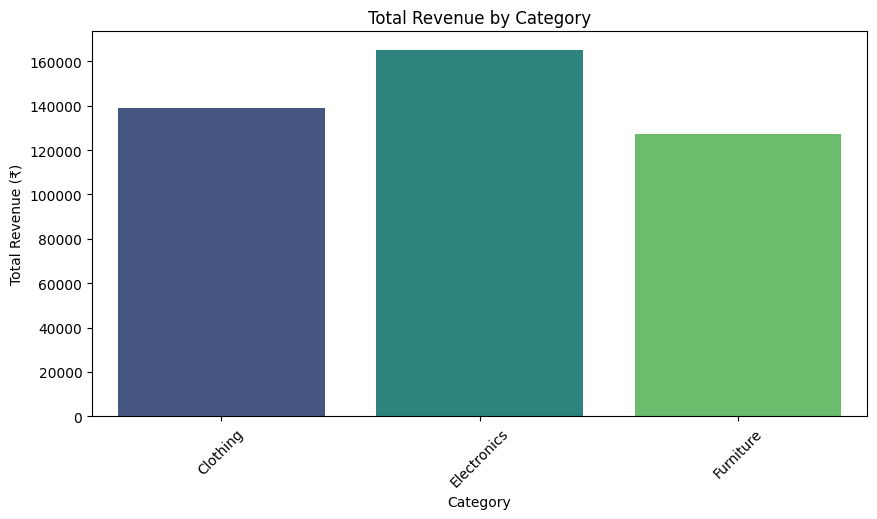

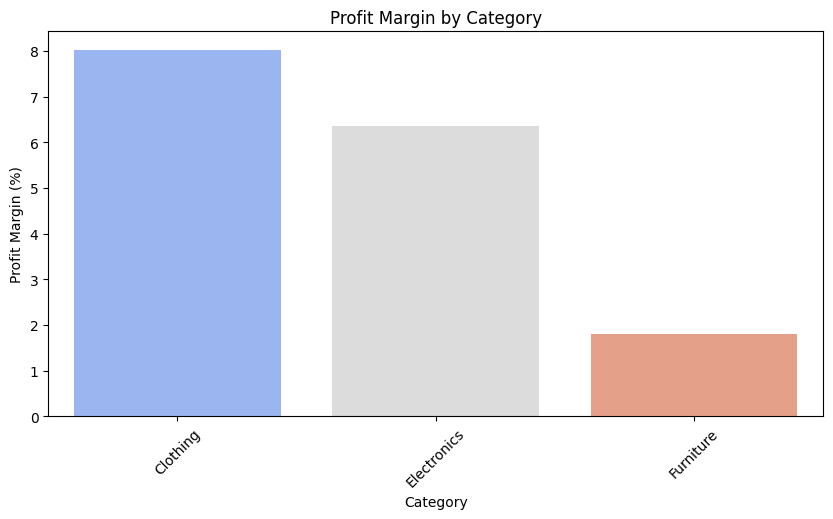

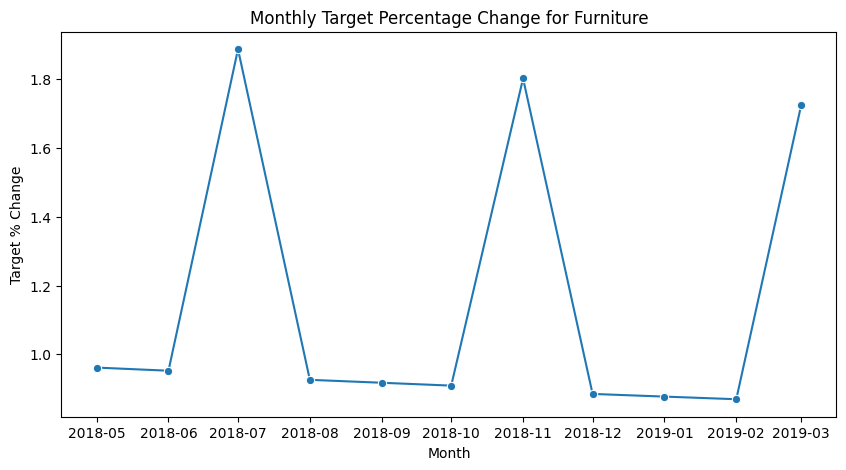


Sales & Profitability Analysis:
              Total_Sales  Total_Profit  Order_Count  Avg_Profit_Per_Order  \
Category                                                                    
Clothing        139054.0       11163.0          949             11.762908   
Electronics     165267.0       10494.0          308             34.071429   
Furniture       127181.0        2298.0          243              9.456790   

             Profit_Margin  
Category                    
Clothing          8.027817  
Electronics       6.349725  
Furniture         1.806874  

Target Achievement Analysis:
    Month of Order Date   Category   Target  Target_Percentage_Change
0           2018-04-01  Furniture  10400.0                       NaN
1           2018-05-01  Furniture  10500.0                  0.961538
2           2018-06-01  Furniture  10600.0                  0.952381
3           2018-07-01  Furniture  10800.0                  1.886792
4           2018-08-01  Furniture  10900.0                 

In [10]:
plt.figure(figsize=(10, 5))
sns.barplot(x=category_sales.index, y=category_sales["Total_Sales"], hue=category_sales.index, palette="viridis", legend=False)
plt.xlabel("Category")
plt.ylabel("Total Revenue (₹)")
plt.title("Total Revenue by Category")
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 5))
sns.barplot(x=category_sales.index, y=category_sales["Profit_Margin"], hue=category_sales.index, palette="coolwarm", legend=False)
plt.xlabel("Category")
plt.ylabel("Profit Margin (%)")
plt.title("Profit Margin by Category")
plt.xticks(rotation=45)
plt.show()

if not furniture_target.empty:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=furniture_target["Month of Order Date"], y=furniture_target["Target_Percentage_Change"], marker='o')
    plt.xlabel("Month")
    plt.ylabel("Target % Change")
    plt.title("Monthly Target Percentage Change for Furniture")
    plt.show()
else:
    print("No data available for 'Furniture' target percentage change.")


In [11]:
print("\nSales & Profitability Analysis:\n", category_sales)


Sales & Profitability Analysis:
              Total_Sales  Total_Profit  Order_Count  Avg_Profit_Per_Order  \
Category                                                                    
Clothing        139054.0       11163.0          949             11.762908   
Electronics     165267.0       10494.0          308             34.071429   
Furniture       127181.0        2298.0          243              9.456790   

             Profit_Margin  
Category                    
Clothing          8.027817  
Electronics       6.349725  
Furniture         1.806874  


**Question 1:**

**Part 1 :**
Top-Performing Category: Clothing
Total Sales: ₹1,39,054
Total Profit: ₹11,163
Order Count: 949
Avg. Profit Per Order: ₹11.76
Profit Margin: 8.03% (Highest among all categories)
The Clothing category is the top-performing segment based on its high total sales, highest profit margin, and largest order count. The high number of orders suggests strong demand, and the moderate pricing combined with steady sales volume results in the best profit margin.

Underperforming Category: Furniture
Total Sales: ₹1,27,181
Total Profit: ₹2,298
Order Count: 243
Avg. Profit Per Order: ₹9.46
Profit Margin: 1.81% (Lowest among all categories)
The Furniture category is the weakest performer, with the lowest profit margin and total profit despite decent sales. High costs, lower demand, and possibly high shipping/handling expenses may be contributing to the low profitability.

Reasons for Performance Differences
Demand & Order Volume – Clothing has the highest number of orders (949), indicating frequent purchases, while Furniture has the lowest (243), suggesting lower demand.
Profit Margins – Clothing has an 8.03% margin, meaning it retains more profit from each sale. Furniture, with only 1.81%, may have higher costs or discounts affecting profitability.

In [12]:
print("\nTarget Achievement Analysis:\n", furniture_target if not furniture_target.empty else "No Data Available")


Target Achievement Analysis:
    Month of Order Date   Category   Target  Target_Percentage_Change
0           2018-04-01  Furniture  10400.0                       NaN
1           2018-05-01  Furniture  10500.0                  0.961538
2           2018-06-01  Furniture  10600.0                  0.952381
3           2018-07-01  Furniture  10800.0                  1.886792
4           2018-08-01  Furniture  10900.0                  0.925926
5           2018-09-01  Furniture  11000.0                  0.917431
6           2018-10-01  Furniture  11100.0                  0.909091
7           2018-11-01  Furniture  11300.0                  1.801802
8           2018-12-01  Furniture  11400.0                  0.884956
9           2019-01-01  Furniture  11500.0                  0.877193
10          2019-02-01  Furniture  11600.0                  0.869565
11          2019-03-01  Furniture  11800.0                  1.724138


**Question 1:**

**Part 2:**
High Target Growth Months:

July 2018: 1.89% increase (from ₹10,600 to ₹10,800)
November 2018: 1.80% increase (from ₹11,100 to ₹11,300)
March 2019: 1.72% increase (from ₹11,600 to ₹11,800)
These months show a notable spike in target increases, suggesting either seasonal demand, promotional campaigns, or increased customer purchasing power.

Stable or Low Growth Months:

April 2018 to June 2018: Growth below 1%
August 2018 to February 2019: Consistently under 1% growth per month
These months indicate a steady increase in targets, likely due to consistent market demand or controlled expansion strategies.

Customer Engagement Strategies
Implement loyalty programs, limited-time offers, and personalized recommendations to encourage repeat purchases and maintain steady sales throughout the year. Providing tailored discounts and exclusive deals can enhance customer retention and boost engagement.

Inventory & Supply Chain Optimization
Ensure sufficient stock availability and optimize delivery timelines, especially during high-growth months, to prevent missed sales opportunities. Efficient inventory management and streamlined logistics can help meet increased demand and improve customer satisfaction.




In [13]:
print("\nRegional Performance Insights:\n", regional_analysis)


Regional Performance Insights:
                 Total_Sales  Avg_Profit  Order_Count
State                                               
Delhi               22531.0   40.364865           74
Gujarat             21058.0    5.344828           87
Madhya Pradesh     105140.0   16.326471          340
Maharashtra         95348.0   21.296552          290
Rajasthan           21149.0   16.986486           74


**Key Regional Disparities in Sales & Profitability**


**Top-Performing Region:**

Madhya Pradesh: ₹1,05,140 in total sales with 340 orders (highest order count)
Maharashtra: ₹95,348 in total sales with 290 orders (second-highest order count)
These two states dominate in sales volume, indicating strong customer demand and market penetration.


**High-Profitability Region:**
Delhi: Highest average profit per order (₹40.36) despite having lower total sales.Suggests a higher-margin product mix or premium pricing strategy working well in this region.


**Underperforming Region:**
Gujarat: Despite 87 orders, it has one of the lowest average profits (₹5.34 per order), indicating low-margin products or high competition affecting pricing power.

Rajasthan: Sales and orders are on the lower side, suggesting weaker market presence or lower demand.



**Regions to Prioritize for Improvement**


Gujarat:
Improve profitability by adjusting product pricing or focusing on higher-margin products.Boost customer engagement through localized promotions and offers.


Rajasthan:
Increase brand awareness through marketing campaigns and influencer partnerships.Expand product range to match local consumer preferences and demand.


Delhi:
Given its high profitability per order, introduce premium offerings and exclusive deals to further capitalize on consumer spending behavior.

Question 2:

**Five things I found particularly efective and user-friendly**

1.   Automated Micro-Savings – The app helps users save money automatically by rounding up their daily spending. For example, if you spend ₹92 on something, the app rounds it up to ₹100 and invests the extra ₹8 in digital gold. This makes saving effortless without needing to think about it.
2.   Low Entry Barrier – You don’t need a lot of money to start investing. The app allows users to begin with as little as ₹10, making it easy for anyone, regardless of their financial situation, to start saving and investing.
3.   Real-Time Gold Price Updates – The app provides live updates on gold prices, so users always know the current value before making an investment. This ensures transparency and helps users make better decisions about when to buy or sell.
4.   Flexible Savings Options – Users have the freedom to decide how they want to save. They can let the app save automatically through round-ups, set a fixed daily savings amount, or manually invest whenever they want. This gives them better control over their savings
5.   Instant Gold Liquidity – Users can sell their digital gold anytime and instantly withdraw the money to their bank account. This ensures easy access to funds whenever needed, making gold investment both secure and flexible.



**Five areas where improvements could be made**

1.  Enhance Banner Landing Page – The landing page currently appears empty, missing an opportunity to engage users. Adding a visually appealing banner with promotions, investment tips, or highlights would make the app more interactive and informative.

2.  Include Gold News in Charts Section – The app lacks a dedicated section for gold-related news, which could help users stay updated on market trends. Integrating real-time price updates, expert insights, and gold market news would improve decision-making for investors.

3.  Improve Text and Font Clarity – The current text style and font choices could be improved for better readability. Using modern, well-spaced fonts with proper text alignment would enhance the overall user experience.

4.  Expand Investment Options – The app currently focuses only on digital gold. Introducing Gold ETFs and Sovereign Gold Bonds (SGBs) would provide users with more diverse and long-term investment opportunities.

5.  Introduce a Daily Investment Challenge – A gamified feature encouraging users to invest daily by maintaining a streak and earning rewards would enhance engagement. This would motivate users to develop a consistent saving habit while making the experience more enjoyable.


Question 3:

1. Recurring Savings for Goals-Based Investing
Jar can introduce a goal-based savings feature that allows users to set financial targets such as purchasing a gadget, planning a vacation, or funding education. The app can then automate periodic savings toward these goals, ensuring users stay on track. Additionally, AI-driven insights can analyze spending habits and suggest optimized saving strategies, making the process more efficient and personalized.

2. Credit and Micro-Loans for Users
Leveraging its established trust, Jar can offer micro-loans where users can borrow funds using their digital gold or savings as collateral. This would provide easy access to credit without the need for complex paperwork or high interest rates. Furthermore, the app could introduce a credit score-building system, rewarding responsible saving and timely repayments, helping users improve their financial health and unlock better financial opportunities.

3. Subscription-Based Financial Education & Insights
Jar can introduce a premium subscription service that offers users personalized financial planning, expert investment strategies, and in-depth market insights. This feature would help users make informed financial decisions and build long-term wealth. The subscription could include AI-driven investment recommendations, exclusive webinars with financial experts, and real-time market analysis, positioning Jar as an educational hub for financial literacy while enhancing its value beyond just savings.